## sop.pptx를 한번 읽어보자

``` pip install python-pptx ```

In [1]:
from pptx import Presentation
import pandas as pd
prs = Presentation('sop.pptx')

## 슬라이드는 몇개가 있나..

In [3]:
len(prs.slides)

93

## 1번 슬라이드 안에 Shape는 몇개가있나.

In [4]:
shapes = prs.slides[0].shapes
len(shapes)

22

## 어느 도형이 Table 인가? 

In [5]:
for i, shape in enumerate(shapes):
    if shape.has_table:
         print('{0} 번째도형은 table입니다'.format(i + 1))

1 번째도형은 table입니다


## table크기를 알아보자

In [6]:
table = shapes[0].table
print('row 개수 : ', len(table.rows))
print('columes 개수 : ', len(table.columns))

row 개수 :  9
columes 개수 :  22


## table안의 데이터를 읽어보자
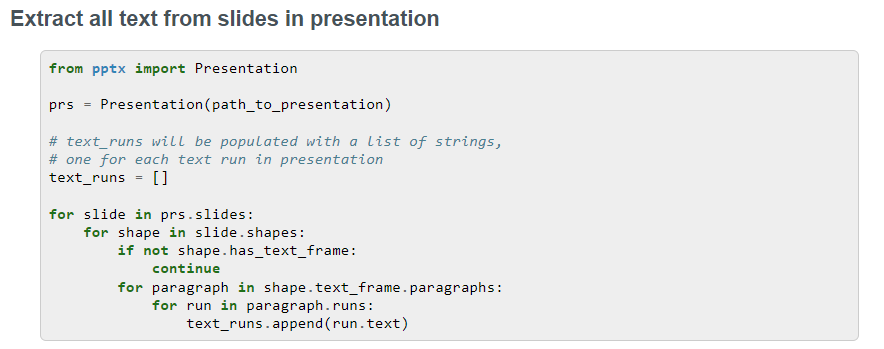   
https://python-pptx.readthedocs.io/en/latest/user/quickstart.html#extract-all-text-from-slides-in-presentation

In [11]:
table = shapes[0].table #첫번째가 테이블이므로 
table.cell(3,9).text_frame.paragraphs[0].runs[0].text

'EXHAUST PURGE LINE'

In [15]:
for paragraph in table.cell(3,9).text_frame.paragraphs:
    for run in paragraph.runs:
        print(run.text)

EXHAUST PURGE LINE


## table전체 텍스트를 모두 출력

In [16]:
for r in range(0,len(table.rows)):
    for c in range(0,len(table.columns)):
        for paragraph in table.cell(r,c).text_frame.paragraphs:
            for run in paragraph.runs:
                print('(' , r , ',' , c, ')', run.text)

( 0 , 7 ) c
( 0 , 8 ) SOP NO.
( 0 , 14 ) Title:
( 0 , 15 ) G3_EUV END USER PUMP MODULE
( 1 , 0 ) M
( 1 , 1 ) S
( 1 , 3 ) OP0010
( 2 , 0 ) Ref.
( 2 , 3 ) Man.Item No.
( 2 , 7 ) Ser.Item No.
( 2 , 9 ) Description
( 2 , 10 ) Description
( 2 , 12 ) Qty
( 2 , 13 ) Qty
( 2 , 14 ) Ref.
( 2 , 15 ) Man.Item No.
( 2 , 17 ) Ser.Item No.
( 2 , 18 ) Description
( 2 , 19 ) Description
( 2 , 21 ) Qty
( 3 , 0 ) ASSY
( 3 , 3 ) IE0123064
( 3 , 9 ) EXHAUST PURGE LINE
( 3 , 10 ) ISO250-200 MANIFOLD TEE
( 3 , 13 ) 1
( 4 , 3 ) IE0123173
( 4 , 9 ) PLUG FOR PORT ½ TUBE
( 4 , 10 ) ISO250 BLANK FLANGE
( 4 , 13 ) 1
( 5 , 10 ) ISO250 TRAPPED O-RING VITON
( 7 , 0 ) Instruction:
( 7 , 0 ) 그림과 같이 
( 7 , 0 ) EXP1 ~ FAC Module 
( 7 , 0 ) 첫 번째 
( 7 , 0 ) N2 Back line
( 7 , 0 ) 에 조립하세요
( 7 , 0 ) .
( 7 , 0 ) (Assemble the N2 line on the first line of N2 back line of EXP1 ~ FAC module.) 
( 8 , 0 ) Page
( 8 , 2 ) 10
( 8 , 4 ) Issue
( 8 , 6 ) 01
( 8 , 10 ) Approved
( 8 , 19 ) SOP TEMPLATE – SINGLE LANDSCAPE v5.doc


## Row와 Col을 넣으면 해당 셀의 text를 Return하는 함수를 작성 

In [17]:
def getTextInRowCol(table, row, col) : 
    text = ''
    for paragraph in table.cell(row,col).text_frame.paragraphs:
        for run in paragraph.runs:
            text += run.text 
    return text

In [22]:
getTextInRowCol(table, 3, 13)

'1'

### 첫번째  Item 의 모든 데이터를 모아모자

In [23]:
op_num = getTextInRowCol(table, 1, 3)
item_no = getTextInRowCol(table, 3, 3)
des = getTextInRowCol(table, 3, 9)
qty = getTextInRowCol(table, 3, 13)
item = (op_num, item_no, des, qty)
item

('OP0010', 'IE0123064', 'EXHAUST PURGE LINE', '1')

### 아이템 번호를 넣으면 모든 데이터를 뽑아주는 함수를 만들어보자
1. 6개짜리    
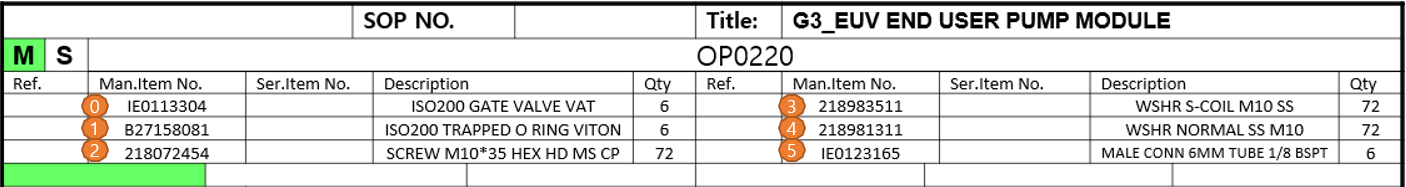   
2. 현재 최대 12개까지 있음   
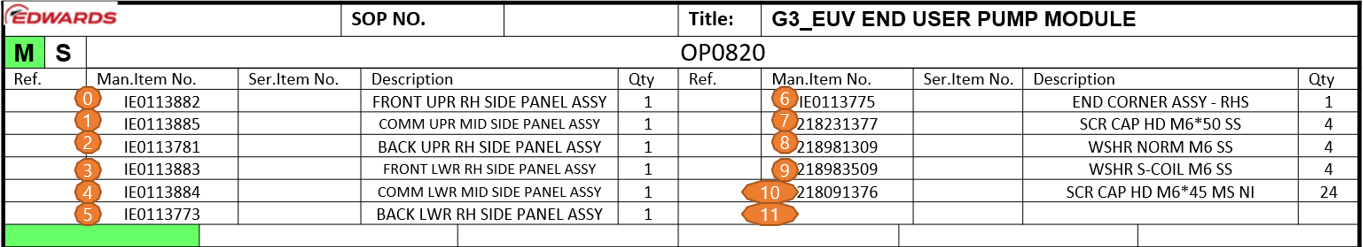   
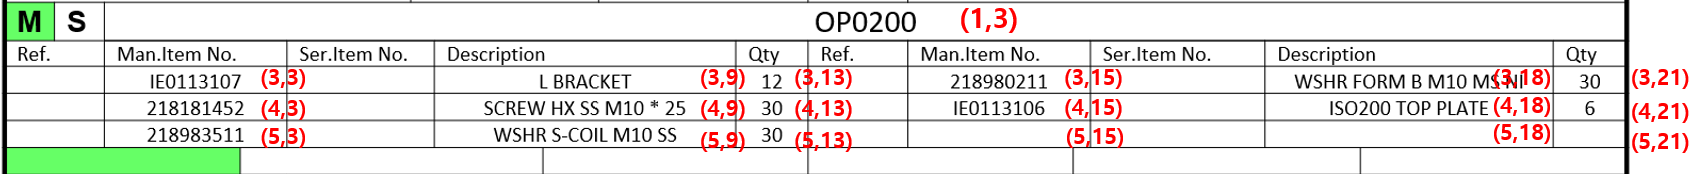


In [24]:
MAX_ITEM_NO = 12
def GetItemInTable(table, idx):        
    OP_ROW = 1 
    OP_COL = 3
    FIRST_ROW = 3
    LEFT_ITEM_COL = 3 
    LEFT_DES_COL = 9
    LEFT_QTY_COL = 13
    RIGHT_ITEM_COL = 15 
    RIGHT_DES_COL = 18
    RIGHT_QTY_COL = 21
    
    right_first_item_no = int(MAX_ITEM_NO / 2)
    
    if idx < right_first_item_no :
        op_num = getTextInRowCol(table, OP_ROW, OP_COL)
        item_no = getTextInRowCol(table, FIRST_ROW + idx, LEFT_ITEM_COL)
        des = getTextInRowCol(table, FIRST_ROW + idx, LEFT_DES_COL )
        qty = getTextInRowCol(table, FIRST_ROW + idx, LEFT_QTY_COL)

    else:
        op_num = getTextInRowCol(table, OP_ROW, OP_COL)
        item_no = getTextInRowCol(table, FIRST_ROW + idx - right_first_item_no, RIGHT_ITEM_COL)
        des = getTextInRowCol(table, FIRST_ROW  + idx - right_first_item_no, RIGHT_DES_COL)
        qty = getTextInRowCol(table, FIRST_ROW + idx - right_first_item_no, RIGHT_QTY_COL)
    
    item_list = [op_num, item_no, des, qty]         
    return item_list

Test 해보기

In [30]:
table = prs.slides[0].shapes[0].table
GetItemInTable(table, 3)

['OP0010', '', '', '']

### 한슬라이스의 모든 Item데이터를  DataFrame에 저장하기 

In [31]:
def GetItemsInSlide(slide):
    table = slide.shapes[0].table
    for idx in range(0, MAX_ITEM_NO):
        print(GetItemInTable(table, idx))

In [32]:
GetItemsInSlide(prs.slides[21])

['OP0220', 'IE0113304', 'ISO200 GATE VALVE VAT', '6']
['OP0220', 'B27158081', 'ISO200 TRAPPED O RING VITON', '6']
['OP0220', '218072454', 'SCREW M10*35 HEX HD MS CP', '72']
['OP0220', '', '', '']
['OP0220', '', '', '']
['OP0220', '', '', '']
['OP0220', '218983511', 'WSHR S-COIL M10 SS', '72']
['OP0220', '218981311', 'WSHR NORMAL SS M10', '72']
['OP0220', 'IE0123165', 'MALE CONN 6MM TUBE 1/8 BSPT', '6']
['OP0220', '', '', '']
['OP0220', '', '', '']
['OP0220', '', '', '']


In [33]:
def GetItemsInSlide(slide):
    table = slide.shapes[0].table
    for idx in range(0, MAX_ITEM_NO):
        item = GetItemInTable(table, idx)
        if item[3].isnumeric() and item[2]: # Description에 데이터가 있고 qty가 숫자이면 데이터 인정 
            print(item)

In [39]:
GetItemsInSlide(prs.slides[5])

['OP0060', 'IE0123272', 'N2 FRAME MOUNT ASSY', '1']
['OP0060', 'IE0123173', 'PLUG FOR PORT ½ TUBE', '1']


### Slide의 모든 Item들을 담은 Items 를 반환

In [40]:
def GetItemsInSlide(slide):
    items = []
    if slide.shapes[0].has_table:
        table = slide.shapes[0].table
        for idx in range(0, MAX_ITEM_NO):
            item = GetItemInTable(table, idx)
            if item[3].isnumeric() and item[2]: # Description에 데이터가 있고 qty가 숫자이면 데이터 인정 
                items.append(item)
        return items

In [41]:
items = GetItemsInSlide(prs.slides[21])
items

[['OP0220', 'IE0113304', 'ISO200 GATE VALVE VAT', '6'],
 ['OP0220', 'B27158081', 'ISO200 TRAPPED O RING VITON', '6'],
 ['OP0220', '218072454', 'SCREW M10*35 HEX HD MS CP', '72'],
 ['OP0220', '218983511', 'WSHR S-COIL M10 SS', '72'],
 ['OP0220', '218981311', 'WSHR NORMAL SS M10', '72'],
 ['OP0220', 'IE0123165', 'MALE CONN 6MM TUBE 1/8 BSPT', '6']]

### Items를  DataFrame에 저장 

In [42]:
df = pd.DataFrame(columns=['OperationStep','Man.Item.No','Description','Qty'])
items = GetItemsInSlide(prs.slides[21])   
for item in items:
    df.loc[len(df)] = item
df

,OperationStep,Man.Item.No,Description,Qty
0,OP0220,IE0113304,ISO200 GATE VALVE VAT,6
1,OP0220,B27158081,ISO200 TRAPPED O RING VITON,6
2,OP0220,218072454,SCREW M10*35 HEX HD MS CP,72
3,OP0220,218983511,WSHR S-COIL M10 SS,72
4,OP0220,218981311,WSHR NORMAL SS M10,72
5,OP0220,IE0123165,MALE CONN 6MM TUBE 1/8 BSPT,6


###  모들 Slide를 순회 하면서 적용 

In [43]:
df = pd.DataFrame(columns=['OperationStep','Man.Item.No','Description','Qty'])

for slide in prs.slides:
    items = GetItemsInSlide(slide) 
    if items : # items list 에 데이터가 있으면 추가 
        for item in items:
            df.loc[len(df)] = item
df

,OperationStep,Man.Item.No,Description,Qty
0,OP0010,IE0123064,EXHAUST PURGE LINE,1
1,OP0010,IE0123173,PLUG FOR PORT ½ TUBE,1
2,OP0020,IE0123064,EXHAUST PURGE LINE,1
3,OP0030,IE0123091,EXHAUST PURGE LINE ASSY,1
4,OP0030,IE0123272,N2 FRAME MOUNT ASSY,1
...,...,...,...,...
381,OP0940,C10512501,NW10/16 CLAMPING RING S/S,24
382,OP0940,C10512490,NW10/16 TRAPPED O RING,24
383,OP0940,IE0113474,LOAD LOCK TRANSDUCER,6
384,OP0940,IE0114222,NW16 HOT SWAP T PORT,6


##  csv로 저장하기

In [44]:
f_name = 'sop_pptx.csv'
df.to_csv(f_name,encoding='utf-8-sig', index=False, mode='w', header=True)